#### Анастасия, привет! 

Меня зовут Максим Попов, и я буду проверять твой проект. Давай будем общаться на «ты». Но если тебе комфортнее на «вы», обязательно сообщи мне об этом. 
По ходу тетрадки ты найдешь комментарии к проекту, они будут в отдельных ячейках Markdown с заголовком «Комментарий ревьюера». Постарайся учесть эти комментарии для дальнейших проектов.

---

Я буду отмечать комментарии цветом и примечанием. В конце заголовка комментария будет указан номер итерации проверки. Пожалуйста, не удаляй и не правь мои комментарии

Критично - требует исправления, влияет на удачное выполнение проекта

Рекомендация - комментарий является рекомендацией или советом. Mожешь учесть их при выполнении будущих заданий. На твое усмотрение

Отлично - Так отмечены удачные решения и подходы, на которые стоит опираться в будущих проектах


---
<div class="alert alert-block alert-danger">
    

### Комментарий от ревьюера
Критично

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера
Рекомендация

Такой комментарий является рекомендацией или советом. Mожешь учесть их при выполнении будущих заданий. На твое усмотрение. 
</div>

---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера
Отлично
    
Так отмечены удачные решения и подходы, на которые стоит опираться в будущих проектах
</div>


Желательно реагировать на комментарии ('исправлено', 'не понятно как исправить ошибку' и т.п.) - так мы сможем более эффективно поработать над этим проектом.

---

Будет здорово, если ты будешь помечать свои действия следующим образом:



<div class="alert alert-block alert-info">

### Комментарий студента:

</div>

<div class="alert alert-block alert-success">
        
### Комментарий от ревьюера v_1
    
Анастасия, отличная работа, но следующие моменты надо исправить
    
1. Анализ удаленных значений
2. Проверка гипотез
    
Подробные комментарии по ходу работы
    
Желтые комментарии-рекомендации на твое усмотрение.
    
Если есть вопросы ко мне, можешь оставить их в отдельном комментарии
</div>

# Описание проекта
Вы работаете в стартапе, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи вашего мобильного приложения.
Изучите воронку продаж. Узнайте, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?
После этого исследуйте результаты A/A/B-эксперимента


<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера v_1
Отлично
    
Молодец, что в начале проекте знакомишь с ним, так работа приобретает структуру и лучше воспринимается.
    
Также рекомендую дать название проекту, а оглавление из плагина TOC можно перенести, установив галочку "Add Notebook Toc Cell"
    
</div>

## Откройте файл с данными и изучите общую информацию
Путь к файлу: /datasets/logs_exp.csv.

In [5]:
import pandas as pd
from datetime import date
from scipy import stats as st
import numpy as np
import math as mth
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from statsmodels.stats.proportion import proportions_ztest
import warnings

In [12]:
data = pd.read_csv('/datasets/logs_exp.csv', sep='\t')
data.info()
data.head()

FileNotFoundError: [Errno 2] No such file or directory: '/datasets/logs_exp.csv'

<div class="alert alert-block alert-success">
    
### Комментарий от ревьюера v_1
Отлично
    
Отлично, библиотеки импортированы в начале тетрадки, в отдельной ячейке.
</div>

## Подготовьте данные
- Замените названия столбцов на удобные для вас;
- Проверьте пропуски и типы данных. Откорректируйте, если нужно;
- Добавьте столбец даты и времени, а также отдельный столбец дат;

In [8]:
#Заменим название данных
data.rename(columns = {'EventName':'event_name', 'DeviceIDHash':'user_id', 'EventTimestamp': 'time', 'ExpId':'group'}, inplace = True )

#Меняем тип данных
data['time'] = pd.to_datetime(data['time'], unit='s')

#Добавим столбец с датой 
data['date'] = data['time'].dt.strftime('%Y-%m-%d')

#Проверим наличие дубликатов 
data.duplicated()
data = data.drop_duplicates()

data.info()
data.head()

NameError: name 'data' is not defined

<div class="alert alert-block alert-warning">
    
### Комментарий от ревьюера v_1
Рекомендация

С подготовкой все ОК, но рекомендую завернуть базывые проверки в функцию и использовать ее и в следующих проектах, и в целом при дальнейшей работы с данными
    
1. Не стоит помещать весь код в одну ячейку
    
2. При удалении дубликатов (и вообще при удалении строк из датафрейма) следует обновлять индексы
</div>

## Изучите и проверьте данные
- Сколько всего событий в логе?
- Сколько всего пользователей в логе?
- Сколько в среднем событий приходится на пользователя?
- Данными за какой период вы располагаете? Найдите максимальную и минимальную дату. Постройте гистограмму по дате и времени. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определите, с какого момента данные полные и отбросьте более старые. Данными за какой период времени вы располагаете на самом деле?
- Много ли событий и пользователей вы потеряли, отбросив старые данные?
- Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.

In [61]:
#Посмотрим склько событий в логе
print(data['user_id'].count())

#Посмотрим сколько пользователей в логе
users = data['user_id'].nunique()
print(users)
#Посчитаем сколько в среднем событий приходится на пользователей 
events1 = data.groupby('user_id')['event_name'].agg('count').median()
print(events1)
#Найдите максимальную и минимальную дату
print(data['time'].min())
print(data['time'].max())

243713
7551
20.0
2019-07-25 04:43:36
2019-08-07 21:15:17


<div class="alert alert-block alert-warning">
    
### Комментарий от ревьюера v_1
Рекомендация
    
Расчеты верны, но было бы еще интересно посмотреть на распределение количества событий по пользователям, построив гистограмму. Явно в задании это не прописано, но такое действие даст тебе более глубокое представление о данных и покажет, какая из описательных статистик лучше охарактеризует распределение
    
</div>

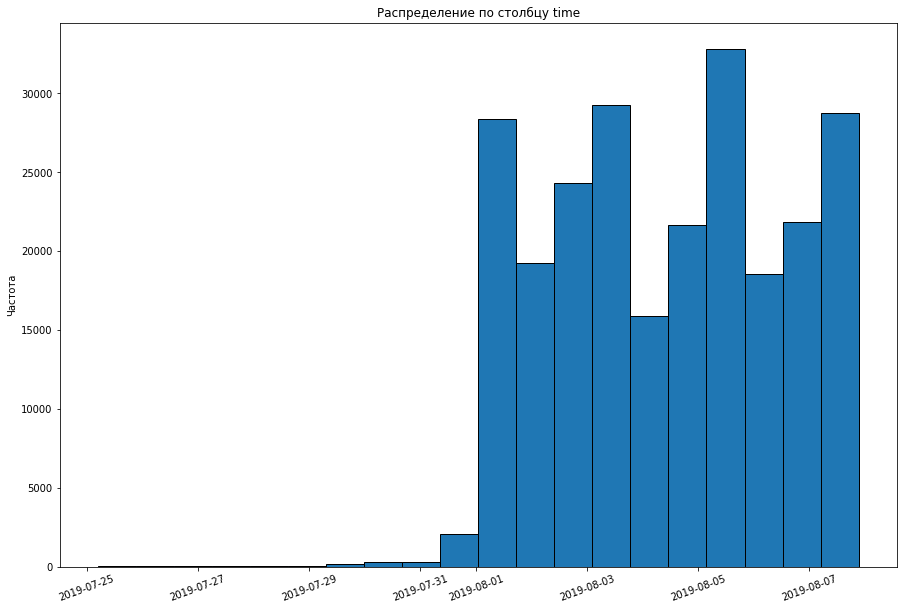

In [62]:
plt.figure(figsize =(15, 10))
data['time'].hist(
                bins=20, edgecolor='black'
                )
plt.title('Распределение по столбцу time')
plt.xticks(rotation=20)
plt.ylabel('Частота')
plt.grid()
plt.show()

<div class="alert alert-block alert-warning">
    
### Комментарий от ревьюера v_1
Рекомендация
    
При построении гистограмм, отражающих временные отрезки, количество бинов стоит определять так, чтобы каждый бин соответствовал определенному временному промежутку

В ячейке ниже пример
</div>

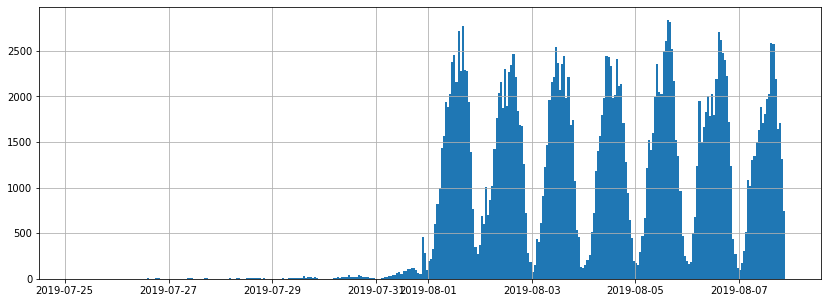

In [63]:
# код ревьюера
data['time'].hist(bins=14*24, figsize=(14, 5));

In [64]:
#Отбросим более старые данные 
data =data[data['time'] >='2019-08-01']
#print(data)

#Посмотрим сколько событий и пользователей осталось 
print(data['user_id'].count())

#Посмотрим сколько пользователей в логе
print(data['user_id'].nunique())
new_users = data['user_id'].nunique()
new_users

240887
7534


7534

Оставили перюод с 2019-08-01  по 2019-08-07 
За этот пирюод у нас 242917 событий в логн и  7542 пользователей.
Отбросив старые данные, мы потеряли не много пользователей и событий.

<div class="alert alert-block alert-danger">
    

### Комментарий от ревьюера v_1
Критично
    
1. По графику видно, что данные у нас с 1-го августа, а не с 31-го июля

2. При анализе удаленных значений следует рассчитать сколько событий и пользователей потеряно, в абсолютных и относительных показателях
</div>

## Изучите воронку событий
- Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.
- Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие.
- Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.
- По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.
- На каком шаге теряете больше всего пользователей?
- Какая доля пользователей доходит от первого события до оплаты?

### Посмотрим, какие события есть в логах, как часто они встречаются

In [65]:
data['event_name'].value_counts()

MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event_name, dtype: int64

### Посчитаем, сколько пользователей совершали каждое из этих событий.

In [66]:
events = data.groupby('event_name').agg({'event_name':'count', 'user_id':'nunique'}).sort_values(by='user_id', ascending=False)
events['percent'] = events['user_id'] /  data['user_id'].nunique()*100
events.rename(columns = {'user_id':'users','event_name':'event_n'},inplace = True)
events

,event_n,users,percent
event_name,,,
MainScreenAppear,117328,7419,98.473586
OffersScreenAppear,46333,4593,60.963632
CartScreenAppear,42303,3734,49.561986
PaymentScreenSuccessful,33918,3539,46.973719
Tutorial,1005,840,11.149456


### Преположем в каком порядке происходят события

- главная страница (MainScreenAppear) 
- выбор товара(OffersScreenAppear) 
- добавление в корзину(CartScreenAppear) 
- оплата(PaymentScreenSuccessful)
- инструкцию (Tutorial) 

<div class="alert alert-block alert-success">
    
### Комментарий от ревьюера v_1

Верные расчеты и рассуждения 👍
    
Но справка, скорее, опциональный момент, который может происходит на любом из этапов и не вписывается в платежную воронку
    
</div>

### По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). 

In [67]:
events['transition'] = events['users']/events['users'].shift(1)
events['transition'] = (events['transition'] * 100).round(2).map('{0:.2f}%'.format)
events

,event_n,users,percent,transition
event_name,,,,
MainScreenAppear,117328,7419,98.473586,nan%
OffersScreenAppear,46333,4593,60.963632,61.91%
CartScreenAppear,42303,3734,49.561986,81.30%
PaymentScreenSuccessful,33918,3539,46.973719,94.78%
Tutorial,1005,840,11.149456,23.74%


от MainScreenAppear до OffersScreenAppear - 62%
от OffersScreenAppear до CartScreenAppear - 81%
от CartScreenAppear до PaymentScreenSuccessful - 94%

<div class="alert alert-block alert-success">

    
### Комментарий от ревьюера v_1

Доля пользователей, относительно предыдущего шага посчитана верно 👍

Но по такой таблице складывается впечатление, что конечная цель справка, а не успешный платеж
    
</div>

Больше всего пользователей мы теряем между первым(7429) и вторым(4606) шагом

<div class="alert alert-block alert-warning">
    
### Комментарий от ревьюера v_1
Рекомендация
    
На этом шаге было бы здорово визуализировать воронку, идеально для этого подходит plotly, funnel график
    
По ссылке можно ознакомиться с различными графиками воронок
    
https://plotly.com/python/funnel-charts/
    
</div>

## Изучите результаты эксперимента
- Сколько пользователей в каждой экспериментальной группе?
- Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.
- Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?
- Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?
- Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.

### Сколько пользователей в каждой экспериментальной группе?

In [68]:
#Посмотрим сколько пользователей в каждой группе
experiment = data.groupby('group')['user_id'].nunique()
experiment

group
246    2484
247    2513
248    2537
Name: user_id, dtype: int64

Число участников примерно одинаковое 

### Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.

In [69]:
exp_246 = data.query('group == 246').groupby('group')['user_id'].nunique().reset_index()
exp_247 = data.query('group == 247').groupby('group')['user_id'].nunique().reset_index()
diff = 1 - exp_246.iloc[0]['user_id'] / exp_247.iloc[0]['user_id']
print('{:.2%}'.format(diff))

1.15%


Между выборками 246 и 247 разница небольшая, ~1.27%

### Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. 

In [70]:
#Посчитаем число пользователей, совершивших событие в каждой из контрольных групп
event_group = data[data['event_name']!='Tutorial'].pivot_table(
    index='event_name', 
    columns='group', 
    values='user_id',
    aggfunc='nunique').sort_values(by=246, ascending=False)

event_group

group,246,247,248
event_name,,,
MainScreenAppear,2450,2476,2493
OffersScreenAppear,1542,1520,1531
CartScreenAppear,1266,1238,1230
PaymentScreenSuccessful,1200,1158,1181


- Самое популяпное событие - MainScreenAppear
- Число пользователей совершивших это событие 
- group 246 - 2452
- group 247 - 2479
- group 248 - 2498

<div class="alert alert-block alert-success">

    
### Комментарий от ревьюера v_1

Данные подготовлены 👍
    
    
</div>

In [71]:
# Посчитайте долю пользователей, совершивших это событие
event_group = event_group.reset_index()
event_group['percent246'] = event_group[246] /  experiment[246] *100
event_group['percent247'] = event_group[247] /  experiment[247] *100
event_group['percent248'] = event_group[248] /  experiment[248] *100
event_group

group,event_name,246,247,248,percent246,percent247,percent248
0,MainScreenAppear,2450,2476,2493,98.631240,98.527656,98.265668
1,OffersScreenAppear,1542,1520,1531,62.077295,60.485476,60.346866
2,CartScreenAppear,1266,1238,1230,50.966184,49.263828,48.482460
3,PaymentScreenSuccessful,1200,1158,1181,48.309179,46.080382,46.551045


<div class="alert alert-info"> Привет! Дальше у меня выдает ошибку 'event_name' и честно,я не понимаю что с ним не так..Кажется,что все просто,я уже сто раз проверила и за помощью к колегам обращалась
Но безрезультатно((
    Буду благодарна,если ты мне поможешь! :)
</div>

<div class="alert alert-block alert-danger">
    
### Комментарий от ревьюера v_1
Критично

В датафрейме **event_group** нет колонки **event_name**, это индекс, а не колонка

</div>

In [2]:
def z_test(group1, group2, alpha):
    for i in event_group.index:
        p1 = event_group[group1][i] / experiment[group1]
        # пропорция успехов во второй группе:
        p2 = event_group[group2][i] / experiment[group2]
        # пропорция успехов в комбинированном датасете:
        p_combined = ((event_group[group1][i] + event_group[group2][i]) / 
                      (experiment[group1] + experiment[group2]))
        # разница пропорций в датасетах
        difference = p1 - p2
        # считаем статистику в ст.отклонениях стандартного нормального распределения
        z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * 
                                        (1/experiment[group1] + 1/experiment[group2]))
        # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
        distr = st.norm(0, 1) 
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        print('{} p-значение: {}'.format(event_group['event_name'][i], p_value))
        if (p_value < alpha):
            print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
        else:
            print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")
        print('')
        
z_test(246, 247, 0.01)

NameError: name 'event_group' is not defined

Можно сказать, что пользователи, пришедшие в АБ-тест, довольно однородно распределились, и мы можем делать сравнение любой из этих групп с тестовой (248).

### Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?

In [73]:
#посмотрим на события в 246 и 248 группах
z_test(246, 248, 0.05)

MainScreenAppear p-значение: 0.2949721933554552
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear p-значение: 0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear p-значение: 0.07842923237520116
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful p-значение: 0.2122553275697796
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



In [74]:
#посмотрим на события в 247 и 248 группах
z_test(247, 248, 0.05)

MainScreenAppear p-значение: 0.4587053616621515
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear p-значение: 0.9197817830592261
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear p-значение: 0.5786197879539783
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful p-значение: 0.7373415053803964
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



In [ ]:
#объединим две контрольные группы в одну и оставим ее под номером 246.
exp = data.copy()
exp["group"].replace({247: 246}, inplace=True)
exp["group"].value_counts()

In [1]:
z_test( exp, [246, 248], 0.05) 

NameError: name 'z_test' is not defined